In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from WindPy import w
%matplotlib inline

In [108]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

## 获取起始日期

In [109]:
today = datetime.datetime.today()

In [110]:
today.strftime('%Y-%m-%d')

'2019-04-01'

In [111]:
start_date = today - datetime.timedelta(365) # 最近1年

In [112]:
start_date.strftime('%Y-%m-%d')

'2018-04-01'

## 获取数据

In [113]:
df = pd.read_excel(u'../data/资产与宏观变量.xlsx')

In [114]:
df

,Variables,Name,Assets
0,USDCNH.FX,美元兑人民币,000300.SH
1,S0059749,10Y国债收益率,000905.SH
2,M0017142,3M SHIBOR,881001.WI
3,S0059766,AA级企业债收益率,CBA00602.CS
4,G1122652,股票波动率,CBA02002.CS
5,SPX.GI,标普500,AU9999.SGE
6,G0000891,10Y美债收益率,HSI.HI
7,G8324466,A股市盈率,NaN


In [115]:
var2name = {k: v for k, v in zip(df['Variables'], df['Name'])}

In [116]:
data = w.wsd(df['Assets'].tolist()[:7], 'close', start_date, today)

In [117]:
price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [118]:
price.head()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2018-04-02,3886.9189,6121.9642,4378.5765,113.8652,78.0526,270.84,30093.38
2018-04-03,3862.4796,6059.7089,4344.4897,113.8802,78.0912,272.44,30180.10
2018-04-04,3854.8625,6017.6863,4327.0710,113.9419,78.1288,272.16,29518.69
2018-04-09,3852.9292,6025.6493,4329.9234,114.2462,78.2010,271.50,30229.58
2018-04-10,3927.1729,6063.7423,4377.5354,114.2404,78.2482,271.97,30728.74


In [119]:
price.tail()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2019-03-26,3700.4388,5394.8787,4102.6560,118.7094,79.8132,287.65,28566.91
2019-03-27,3743.3878,5447.8795,4139.7307,118.6702,79.8391,287.10,28728.25
2019-03-28,3728.3953,5370.1234,4102.1660,118.7307,79.8407,286.49,28775.21
2019-03-29,3872.3412,5547.6561,4241.5262,118.8044,79.8696,281.00,29051.36
2019-04-01,3872.3412,5547.6561,4241.5262,118.8044,79.8696,281.00,29051.36


In [120]:
market_variables = [x for x in df['Variables'] if str(x).find('.') != -1]
economic_variables = [x for x in df['Variables'] if str(x).find('.') == -1 and str(x) != 'nan']

In [121]:
market_variables

[u'USDCNH.FX', u'SPX.GI']

In [122]:
economic_variables

[u'S0059749', u'M0017142', u'S0059766', u'G1122652', u'G0000891', u'G8324466']

In [123]:
data = w.wsd(market_variables, 'close', start_date, today)

In [124]:
market_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in market_variables])

In [125]:
market_df.tail()

,美元兑人民币,标普500
2019-03-26,6.7236,2818.46
2019-03-27,6.7382,2805.37
2019-03-28,6.7395,2815.44
2019-03-29,6.7232,2834.40
2019-04-01,6.7232,2834.40


In [126]:
market_nav = (1+market_df.pct_change()).cumprod()

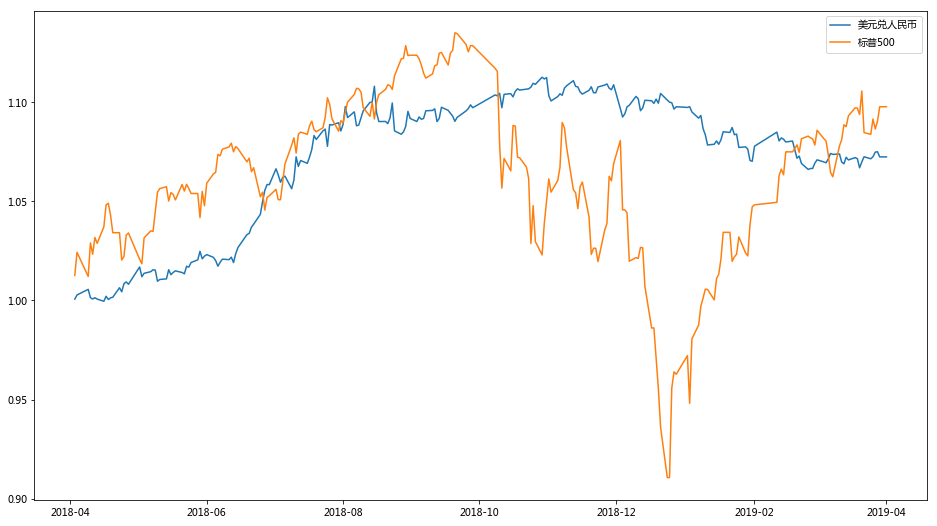

In [127]:
market_nav.plot(figsize=(16, 9))

In [128]:
data = w.edb(economic_variables, start_date, today)

In [129]:
economic_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in economic_variables])

In [130]:
economic_df.head()

,10Y国债收益率,3M SHIBOR,AA级企业债收益率,股票波动率,10Y美债收益率,A股市盈率
2018-04-02,3.7357,4.4052,5.8473,31.55,2.73,17.73
2018-04-03,3.7507,4.3506,5.8373,28.79,2.79,17.57
2018-04-04,3.7234,4.3101,5.8315,27.92,2.79,17.54
2018-04-05,NaN,NaN,NaN,27.25,2.83,NaN
2018-04-06,NaN,NaN,NaN,28.89,2.77,NaN


In [131]:
economic_df[u'信用利差'] = economic_df[u'AA级企业债收益率'] - economic_df[u'10Y国债收益率']

In [132]:
del economic_df[u'AA级企业债收益率']

In [133]:
economic_nav = (1 + economic_df.pct_change()).cumprod().fillna(method='ffill')

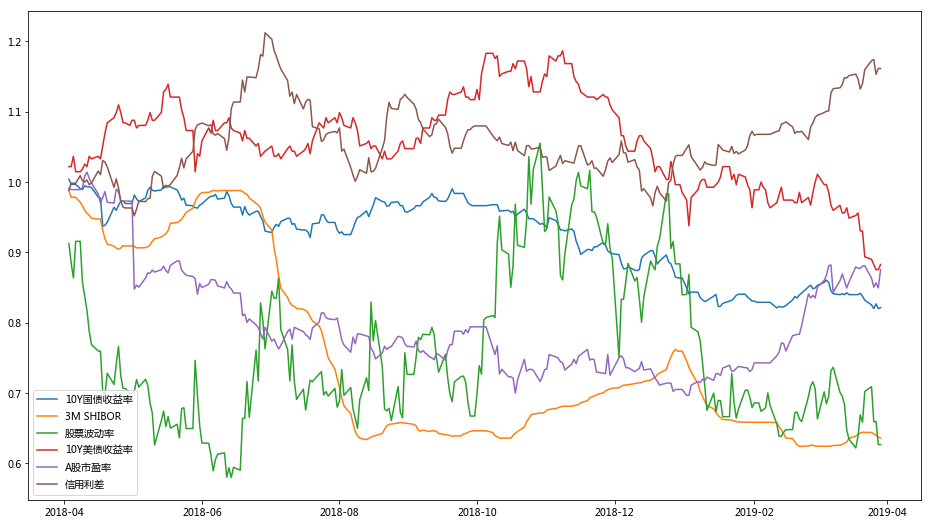

In [134]:
economic_nav.plot(figsize=(16, 9))

In [135]:
variable_df = market_nav.join(economic_nav)

In [136]:
variable_df.iloc[0] = 1

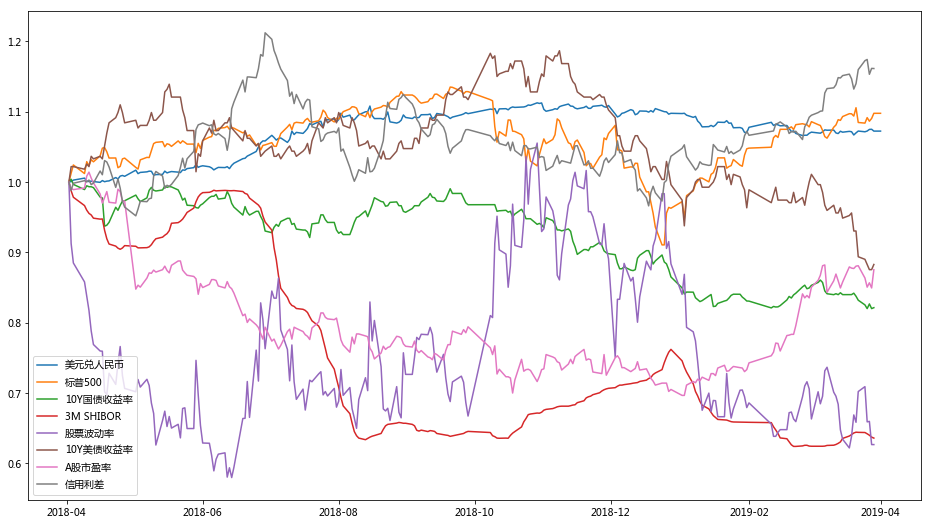

In [137]:
variable_df.plot(figsize=(16, 9))

In [138]:
variable_df.to_excel('../data/variables.xlsx')

## 初始化表格

In [139]:
ret_df = pd.DataFrame()

In [140]:
ret_df[u'成长股'] = price['000905.SH'].pct_change()
ret_df[u'价值股'] = price['000300.SH'].pct_change()
ret_df[u'港股'] = price['HSI.HI'].pct_change()
ret_df[u'黄金'] = price['AU9999.SGE'].pct_change()
ret_df[u'国债'] = price['CBA00602.CS'].pct_change()
ret_df[u'信用债'] = price['CBA02002.CS'].pct_change()

In [141]:
nav = (1 + ret_df).cumprod()

In [142]:
nav.iloc[0] = 1

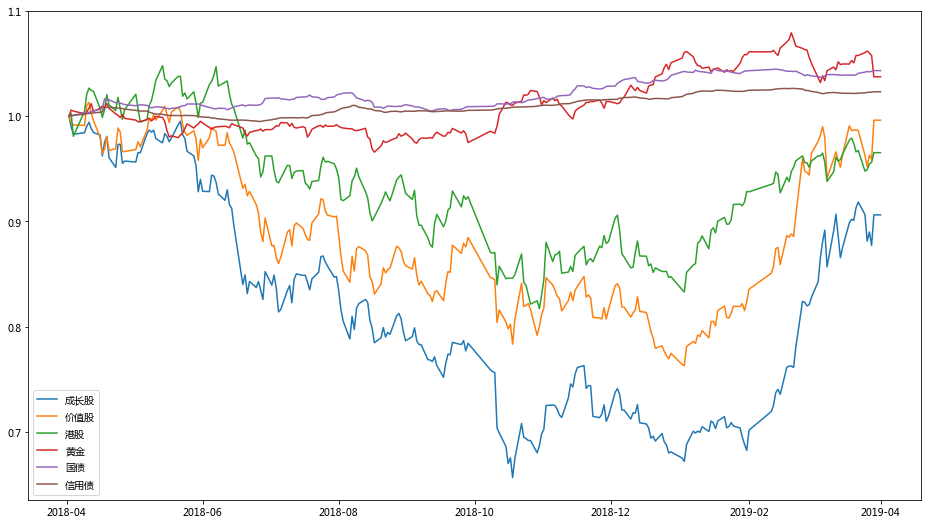

In [143]:
nav.plot(figsize=(16, 9))

In [144]:
nav.to_excel(u'../data/nav.xlsx')

## 生成EWMA相关性矩阵

In [145]:
cor_df = pd.DataFrame(index= ret_df.columns, 
                      columns=market_df.columns.tolist() + economic_df.columns.tolist())

In [146]:
for asset in cor_df.index:
    for var in cor_df.columns:
        if var in market_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+market_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]
        elif var in economic_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+economic_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]

In [147]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.680328,0.679186,-0.190094,-0.211331,-0.520588,-0.54035,0.969894,0.820752
价值股,-0.712644,0.723321,-0.29515,-0.356107,-0.587517,-0.568417,0.989287,0.825442
港股,-0.865774,0.693992,-0.374056,-0.27498,-0.808039,-0.597592,0.867365,0.73989
黄金,-0.373938,-0.0860438,-0.894613,-0.416032,-0.477134,-0.736122,0.238505,0.307544
国债,-0.321361,-0.15414,-0.984131,-0.386977,-0.481157,-0.76484,0.183391,0.276377
信用债,-0.29608,-0.0472968,-0.939953,-0.575549,-0.481756,-0.681931,0.19903,0.235965


In [148]:
cor_df.to_excel(u'../data/ewma_cor.xlsx')

In [149]:
# cor_df[cor_df.abs() < 0.1] = 0

In [150]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.680328,0.679186,-0.190094,-0.211331,-0.520588,-0.54035,0.969894,0.820752
价值股,-0.712644,0.723321,-0.29515,-0.356107,-0.587517,-0.568417,0.989287,0.825442
港股,-0.865774,0.693992,-0.374056,-0.27498,-0.808039,-0.597592,0.867365,0.73989
黄金,-0.373938,-0.0860438,-0.894613,-0.416032,-0.477134,-0.736122,0.238505,0.307544
国债,-0.321361,-0.15414,-0.984131,-0.386977,-0.481157,-0.76484,0.183391,0.276377
信用债,-0.29608,-0.0472968,-0.939953,-0.575549,-0.481756,-0.681931,0.19903,0.235965


## 计算变量的trend

In [151]:
trend = {}
for var in cor_df.columns:
    if var in market_df.columns:
        t = market_df[var]
    elif var in economic_df.columns:
        t = economic_df[var]
    ret = t.pct_change()[-60:]
    up, down = ret[ret > 0].sum(), -ret[ret < 0].sum()
    if up > down:
        trend[var] = up / down
    else:
        trend[var] = -down / up

In [152]:
for k, v in trend.iteritems():
    print k, v

标普500 2.1464918369406454
股票波动率 -1.2602571191379561
3M SHIBOR -3.862552978651316
美元兑人民币 -1.4260703819251914
信用利差 2.385690306272521
10Y国债收益率 -1.1514852825356108
A股市盈率 2.2071783927942445
10Y美债收益率 -1.5419766506835066


# 综合得到Score Board

In [153]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [154]:
board = pd.DataFrame(index=cor_df.index, columns=cor_df.columns)
for var in cor_df.columns:
    x = cor_df[var] * trend[var]
    board[var] = sigmoid(x.astype(np.float32))

In [155]:
trend_df = pd.DataFrame(trend, index=[u'变量趋势'])

In [156]:
board = trend_df.append(board)

In [157]:
board = board[cor_df.columns]

In [158]:
board

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
变量趋势,-1.426070,2.146492,-1.151485,-3.862553,-1.260257,-1.541977,2.207178,2.385690
成长股,0.725159,0.811206,0.554505,0.693445,0.658378,0.697033,0.894799,0.876323
价值股,0.734248,0.825289,0.584157,0.798265,0.677088,0.706093,0.898761,0.877531
港股,0.774632,0.816026,0.606045,0.743096,0.734648,0.715342,0.871516,0.853853
黄金,0.630244,0.453958,0.736942,0.832987,0.645956,0.756776,0.628648,0.675618
国债,0.612607,0.418031,0.756431,0.816786,0.647115,0.764834,0.599835,0.659114
信用债,0.604017,0.474641,0.746937,0.902304,0.647287,0.741067,0.608091,0.637132


In [159]:
board.to_excel(u'../data/dashboard.xlsx')